<a href="https://colab.research.google.com/github/AbdoRashad2001/AbdoRashad2001/blob/main/Untitled17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.restoration import denoise_nl_means, estimate_sigma
import os


In [2]:
from google.colab import files
uploaded = files.upload()


Saving MMIL.zip to MMIL.zip


In [3]:
# STEP 2
import zipfile
import os

with zipfile.ZipFile("MMIL.zip", 'r') as zip_ref:
    zip_ref.extractall("unzipped")



In [66]:
import os
import glob


image_folders = ["/content/unzipped/mammals/alpaca", "/content/unzipped/mammals/horse"]


supported_ext = ('.jpg', '.jpeg', '.png', '.tif', '.tiff')

image_paths = []
for folder in image_folders:
    paths_in_folder = glob.glob(os.path.join(folder, "**", "*.*"), recursive=True)
    image_paths.extend(paths_in_folder) # إضافة المسارات إلى القائمة الرئيسية

image_paths = [f for f in image_paths if f.lower().endswith(supported_ext) and os.path.isfile(f)]

print(f"تم العثور على {len(image_paths)} صورة.")

for path in image_paths[:3]:
    print(path)

تم العثور على 636 صورة.
/content/unzipped/mammals/alpaca/alpaca-0142.jpg
/content/unzipped/mammals/alpaca/alpaca-0055.jpg
/content/unzipped/mammals/alpaca/alpaca-0215.jpg


In [67]:
# STEP 3: مكتبات المعالجة
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show_image(img, title='Image'):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

def adjust_brightness_contrast(img, alpha=1.2, beta=30):
    # alpha = contrast, beta = brightness
    return cv2.convertScaleAbs(img, alpha=alpha, beta=beta)

def apply_gaussian_blur(img, ksize=(5, 5)):
    return cv2.GaussianBlur(img, ksize, 0)

def apply_canny_edge(img, threshold1=100, threshold2=200):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return cv2.Canny(gray, threshold1, threshold2)

def apply_denoising(img):
    return cv2.fastNlMeansDenoisingColored(img, None, 10, 10, 7, 21)

def extract_simple_features(img):
    means = cv2.mean(img)
    return means[:3]  # (B, G, R)

# فولدر لحفظ الصور المعالجة
os.makedirs("processed", exist_ok=True)


In [103]:
# STEP 4: معالجة الصور واحدة واحدة
for path in image_paths:
    filename = os.path.basename(path)
    img = cv2.imread(path)

    if img is None:
        print(f"تعذر قراءة الصورة: {filename}")
        continue

    adjusted = adjust_brightness_contrast(img)
    blurred = apply_gaussian_blur(adjusted)
    edges = apply_canny_edge(blurred)
    denoised = apply_denoising(blurred)

    features = extract_simple_features(denoised)
    print(f"{filename} features (B, G, R): {features}")

    # حفظ الصور الناتجة
    cv2.imwrite(f"processed/{filename}_adjusted.jpg", adjusted)
    cv2.imwrite(f"processed/{filename}_blurred.jpg", blurred)
    cv2.imwrite(f"processed/{filename}_edges.jpg", edges)
    cv2.imwrite(f"processed/{filename}_denoised.jpg", denoised)


alpaca-0142.jpg features (B, G, R): (197.78677368164062, 211.07073974609375, 227.50811767578125)
alpaca-0055.jpg features (B, G, R): (143.9788360595703, 174.98464965820312, 185.7722930908203)
alpaca-0215.jpg features (B, G, R): (150.90203857421875, 200.8707733154297, 204.4883270263672)
alpaca-0131.jpg features (B, G, R): (108.10028076171875, 147.7397918701172, 170.6299591064453)
alpaca-0216.jpg features (B, G, R): (154.1230926513672, 183.05357360839844, 201.0064697265625)
alpaca-0045.jpg features (B, G, R): (207.10955810546875, 216.1160430908203, 231.15989685058594)
alpaca-0036.jpg features (B, G, R): (181.4898223876953, 209.5762481689453, 216.46084594726562)
alpaca-0236.jpg features (B, G, R): (187.5036163330078, 201.91525268554688, 198.27792358398438)
alpaca-0220.jpg features (B, G, R): (164.30007934570312, 182.80621337890625, 180.01138305664062)
alpaca-0249.jpg features (B, G, R): (161.54458618164062, 200.3426055908203, 203.81597900390625)
alpaca-0099.jpg features (B, G, R): (154.22

Before:


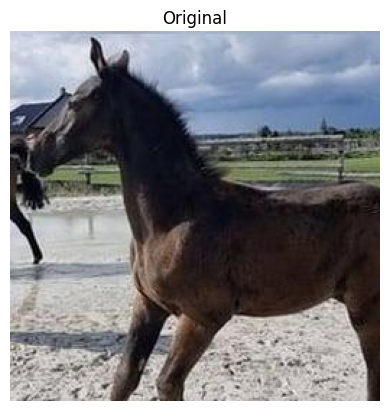

After:


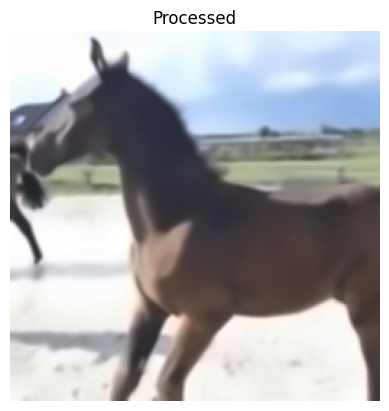

In [115]:
example = cv2.imread(image_paths[400])
result = cv2.imread(f"processed/{os.path.basename(image_paths[400])}_denoised.jpg")

print("Before:")
show_image(example, "Original")

print("After:")
show_image(result, "Processed")


Before:


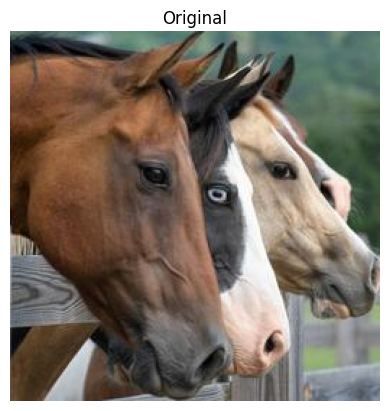

After:


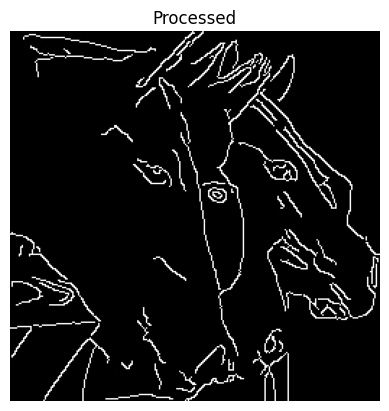

In [112]:
# STEP 5: عرض مثال صورة قبل وبعد
example = cv2.imread(image_paths[405])
result = cv2.imread(f"processed/{os.path.basename(image_paths[405])}_edges.jpg")

print("Before:")
show_image(example, "Original")

print("After:")
show_image(result, "Processed")


Before:


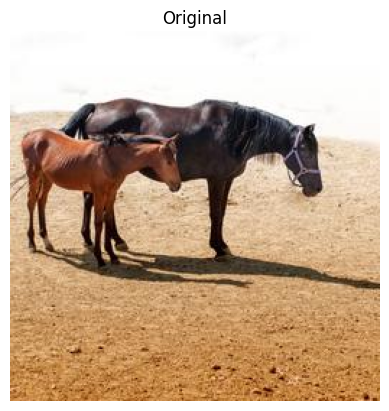

After:


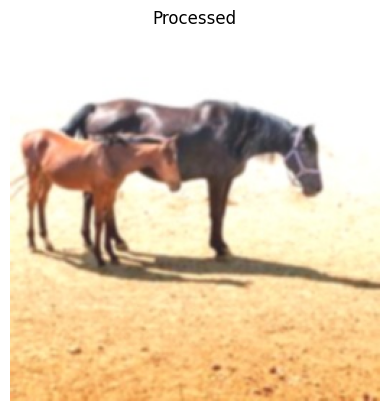

In [113]:
example = cv2.imread(image_paths[501])
result = cv2.imread(f"processed/{os.path.basename(image_paths[501])}_blurred.jpg")

print("Before:")
show_image(example, "Original")

print("After:")
show_image(result, "Processed")


قبل:


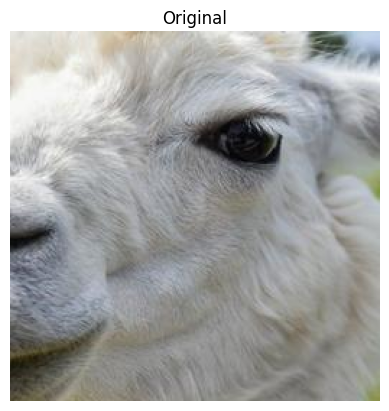

بعد:


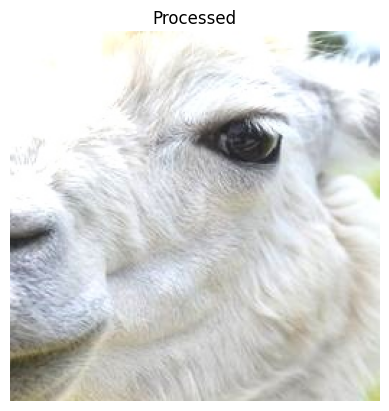

In [110]:
example = cv2.imread(image_paths[305])
result = cv2.imread(f"processed/{os.path.basename(image_paths[305])}_adjusted.jpg")

print("Before:")
show_image(example, "Original")

print("After:")
show_image(result, "Processed")


In [75]:
import os
import glob

base_path = "/content/unzipped/mammals"
supported_ext = ('.jpg', '.jpeg', '.png', '.tif', '.tiff')

for cls in ['alpaca', 'horse']:
    class_path = os.path.join(base_path, cls)
    image_files = glob.glob(os.path.join(class_path, "**", "*.*"), recursive=True)
    image_files = [f for f in image_files if f.lower().endswith(supported_ext) and os.path.isfile(f)]
    print(f"عدد الصور في {cls}: {len(image_files)}")


عدد الصور في alpaca: 333
عدد الصور في horse: 303


In [76]:
import pandas as pd

df = pd.read_csv("/content/classification_ready_features.csv")
print("عدد الصفوف:", len(df))
df.head()


عدد الصفوف: 636


,Filename,Class,B_mean,B_std,G_mean,G_std,R_mean,R_std,Gray_mean,Edge_density
0,alpaca-0142.jpg,alpaca,159.549545,79.299753,177.868896,74.896556,200.785553,63.607751,182.639908,0.112534
1,alpaca-0055.jpg,alpaca,99.432892,66.788597,125.815018,56.890259,135.589264,52.511542,125.734863,0.090027
2,alpaca-0215.jpg,alpaca,113.860016,80.420518,152.961533,54.818631,157.866928,54.087962,149.972641,0.128632
3,alpaca-0131.jpg,alpaca,65.554016,40.656478,99.526154,54.683950,125.315796,64.487639,103.361450,0.060181
4,alpaca-0216.jpg,alpaca,106.775177,57.367885,130.857956,52.477503,148.653488,52.432486,133.448715,0.125809


In [77]:
!ls /content/unzipped/mammals/alpaca
!ls /content/unzipped/mammals/horse


alpaca-0001.jpg  alpaca-0085.jpg  alpaca-0169.jpg  alpaca-0253.jpg
alpaca-0002.jpg  alpaca-0086.jpg  alpaca-0170.jpg  alpaca-0254.jpg
alpaca-0003.jpg  alpaca-0087.jpg  alpaca-0171.jpg  alpaca-0255.jpg
alpaca-0004.jpg  alpaca-0088.jpg  alpaca-0172.jpg  alpaca-0256.jpg
alpaca-0005.jpg  alpaca-0089.jpg  alpaca-0173.jpg  alpaca-0257.jpg
alpaca-0006.jpg  alpaca-0090.jpg  alpaca-0174.jpg  alpaca-0258.jpg
alpaca-0007.jpg  alpaca-0091.jpg  alpaca-0175.jpg  alpaca-0259.jpg
alpaca-0008.jpg  alpaca-0092.jpg  alpaca-0176.jpg  alpaca-0260.jpg
alpaca-0009.jpg  alpaca-0093.jpg  alpaca-0177.jpg  alpaca-0261.jpg
alpaca-0010.jpg  alpaca-0094.jpg  alpaca-0178.jpg  alpaca-0262.jpg
alpaca-0011.jpg  alpaca-0095.jpg  alpaca-0179.jpg  alpaca-0263.jpg
alpaca-0012.jpg  alpaca-0096.jpg  alpaca-0180.jpg  alpaca-0264.jpg
alpaca-0013.jpg  alpaca-0097.jpg  alpaca-0181.jpg  alpaca-0265.jpg
alpaca-0014.jpg  alpaca-0098.jpg  alpaca-0182.jpg  alpaca-0266.jpg
alpaca-0015.jpg  alpaca-0099.jpg  alpaca-0183.jpg  alpaca-0267

In [79]:
ase_path = "./unzipped/mammals"
supported_ext = ('.jpg', '.jpeg', '.png', '.tif', '.tiff')
target_classes = ['alpaca', 'horse']
csv_path = "classification_ready_features.csv"

In [82]:
valid_rows = []
for label in target_classes:
    class_folder = os.path.join(base_path, label)
    if not os.path.exists(class_folder):
        continue
    image_paths = glob.glob(os.path.join(class_folder, "**", "*.*"), recursive=True)
    image_paths = [f for f in image_paths if f.lower().endswith(supported_ext) and os.path.isfile(f)]

    for path in image_paths:
        img = cv2.imread(path)
        if img is None:
            continue
        try:
            features = extract_features(img)
            row = [os.path.basename(path), label] + features
            valid_rows.append(row)
        except Exception as e:
            print(f"❌ Error with {path}: {e}")

In [85]:
import csv

if valid_rows:
    with open(csv_path, mode='w', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(["Filename", "Class", "B_mean", "B_std", "G_mean", "G_std", "R_mean", "R_std", "Gray_mean", "Edge_density"])
        writer.writerows(valid_rows)

In [89]:
from IPython import get_ipython
from IPython.display import display
# %%
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import zipfile
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC  # Using Support Vector Classifier as an example
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

# Import necessary libraries for using pre-trained CNN
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten # Needed to flatten the output of CNN layers

try:
    from google.colab import files
    uploaded = files.upload()
except ImportError:
    print("Running outside Google Colab. Skipping file upload.")


zip_file_path = "MMIL.zip"
extract_to_folder = "unzipped"

if os.path.exists(zip_file_path):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to_folder)
    print(f"Successfully unzipped '{zip_file_path}' to '{extract_to_folder}'.")
else:
    print(f"Zip file '{zip_file_path}' not found. Please ensure it is uploaded or in the correct path.")


image_base_folder = os.path.join(extract_to_folder, "mammals")
image_folders = [
    os.path.join(image_base_folder, "alpaca"),
    os.path.join(image_base_folder, "horse")
]
supported_ext = ('.jpg', '.jpeg', '.png', '.tif', '.tiff')

image_paths = []
for folder in image_folders:
    if os.path.exists(folder):
        paths_in_folder = glob.glob(os.path.join(folder, "**", "*.*"), recursive=True)
        image_paths.extend([f for f in paths_in_folder if f.lower().endswith(supported_ext) and os.path.isfile(f)])
    else:
        print(f"Folder '{folder}' not found. Please check the path.")

print(f"Found {len(image_paths)} images.")

if image_paths:
    print("First 3 image paths found:")
    for path in image_paths[:3]:
        print(path)
else:
    print("No images found with supported extensions in the specified paths.")


print("Loading pre-trained VGG16 model...")
base_model = VGG16(weights='imagenet', include_top=False, pooling='avg', input_shape=(224, 224, 3)) # Using pooling='avg' for simplicity


model = base_model

print("VGG16 model loaded.")



data = []
labels = []

print("Extracting features from images...")
for image_path in image_paths:
    try:
        # Load and resize image to the size expected by VGG16 (224x224)
        img = cv2.imread(image_path)
        if img is None:
            print(f"Warning: Could not read image {image_path}. Skipping.")
            continue

        img = cv2.resize(img, (224, 224))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # VGG expects RGB

        # Convert image to numpy array and preprocess for VGG16
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0) # Add batch dimension

        from tensorflow.keras.applications.vgg16 import preprocess_input
        img_array = preprocess_input(img_array)

        # Extract features
        features = model.predict(img_array)

        # Append features and label
        data.append(features[0])

        label = os.path.basename(os.path.dirname(image_path))
        labels.append(label)

    except Exception as e:
        print(f"Error processing image {image_path}: {e}. Skipping.")
        continue

data = np.array(data)
labels = np.array(labels)

print(f"Finished feature extraction. Extracted features for {len(data)} images.")
print(f"Shape of extracted features: {data.shape}")


X = data
y = labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data prepared for classification.")


print("\nTraining Support Vector Classifier (SVC)...")
classifier = SVC(kernel='linear', random_state=42)


classifier.fit(X_train_scaled, y_train)

print("Classifier trained.")


print("\nEvaluating the classifier...")
y_pred = classifier.predict(X_test_scaled)



acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"✅ Accuracy: {acc * 100:.2f}%")
print("\nClassification Report:")
print(report)

Successfully unzipped 'MMIL.zip' to 'unzipped'.
Found 636 images.
First 3 image paths found:
unzipped/mammals/alpaca/alpaca-0142.jpg
unzipped/mammals/alpaca/alpaca-0055.jpg
unzipped/mammals/alpaca/alpaca-0215.jpg
Loading pre-trained VGG16 model...
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
VGG16 model loaded.
Extracting features from images...
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 884ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 884ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 919ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 524ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 569ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [117]:
import shutil
from google.colab import files

shutil.make_archive("processed_images", 'zip', "processed")
files.download("processed_images.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>